# Explore here

In [40]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [41]:
#abrimos el df que vamos a usar
df=pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/k-nearest-neighbors-project-tutorial/refs/heads/main/winequality-red.csv", sep=";")

df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [42]:
#ahora debemos agregar la columna label
def label_clasificador(quality):
    if quality<5:
        label=0
    elif quality <7:
        label=1
    else :
        label=2
    return label
df["label"]=df["quality"].apply(label_clasificador)



In [43]:
df.drop(columns="quality",inplace=True)

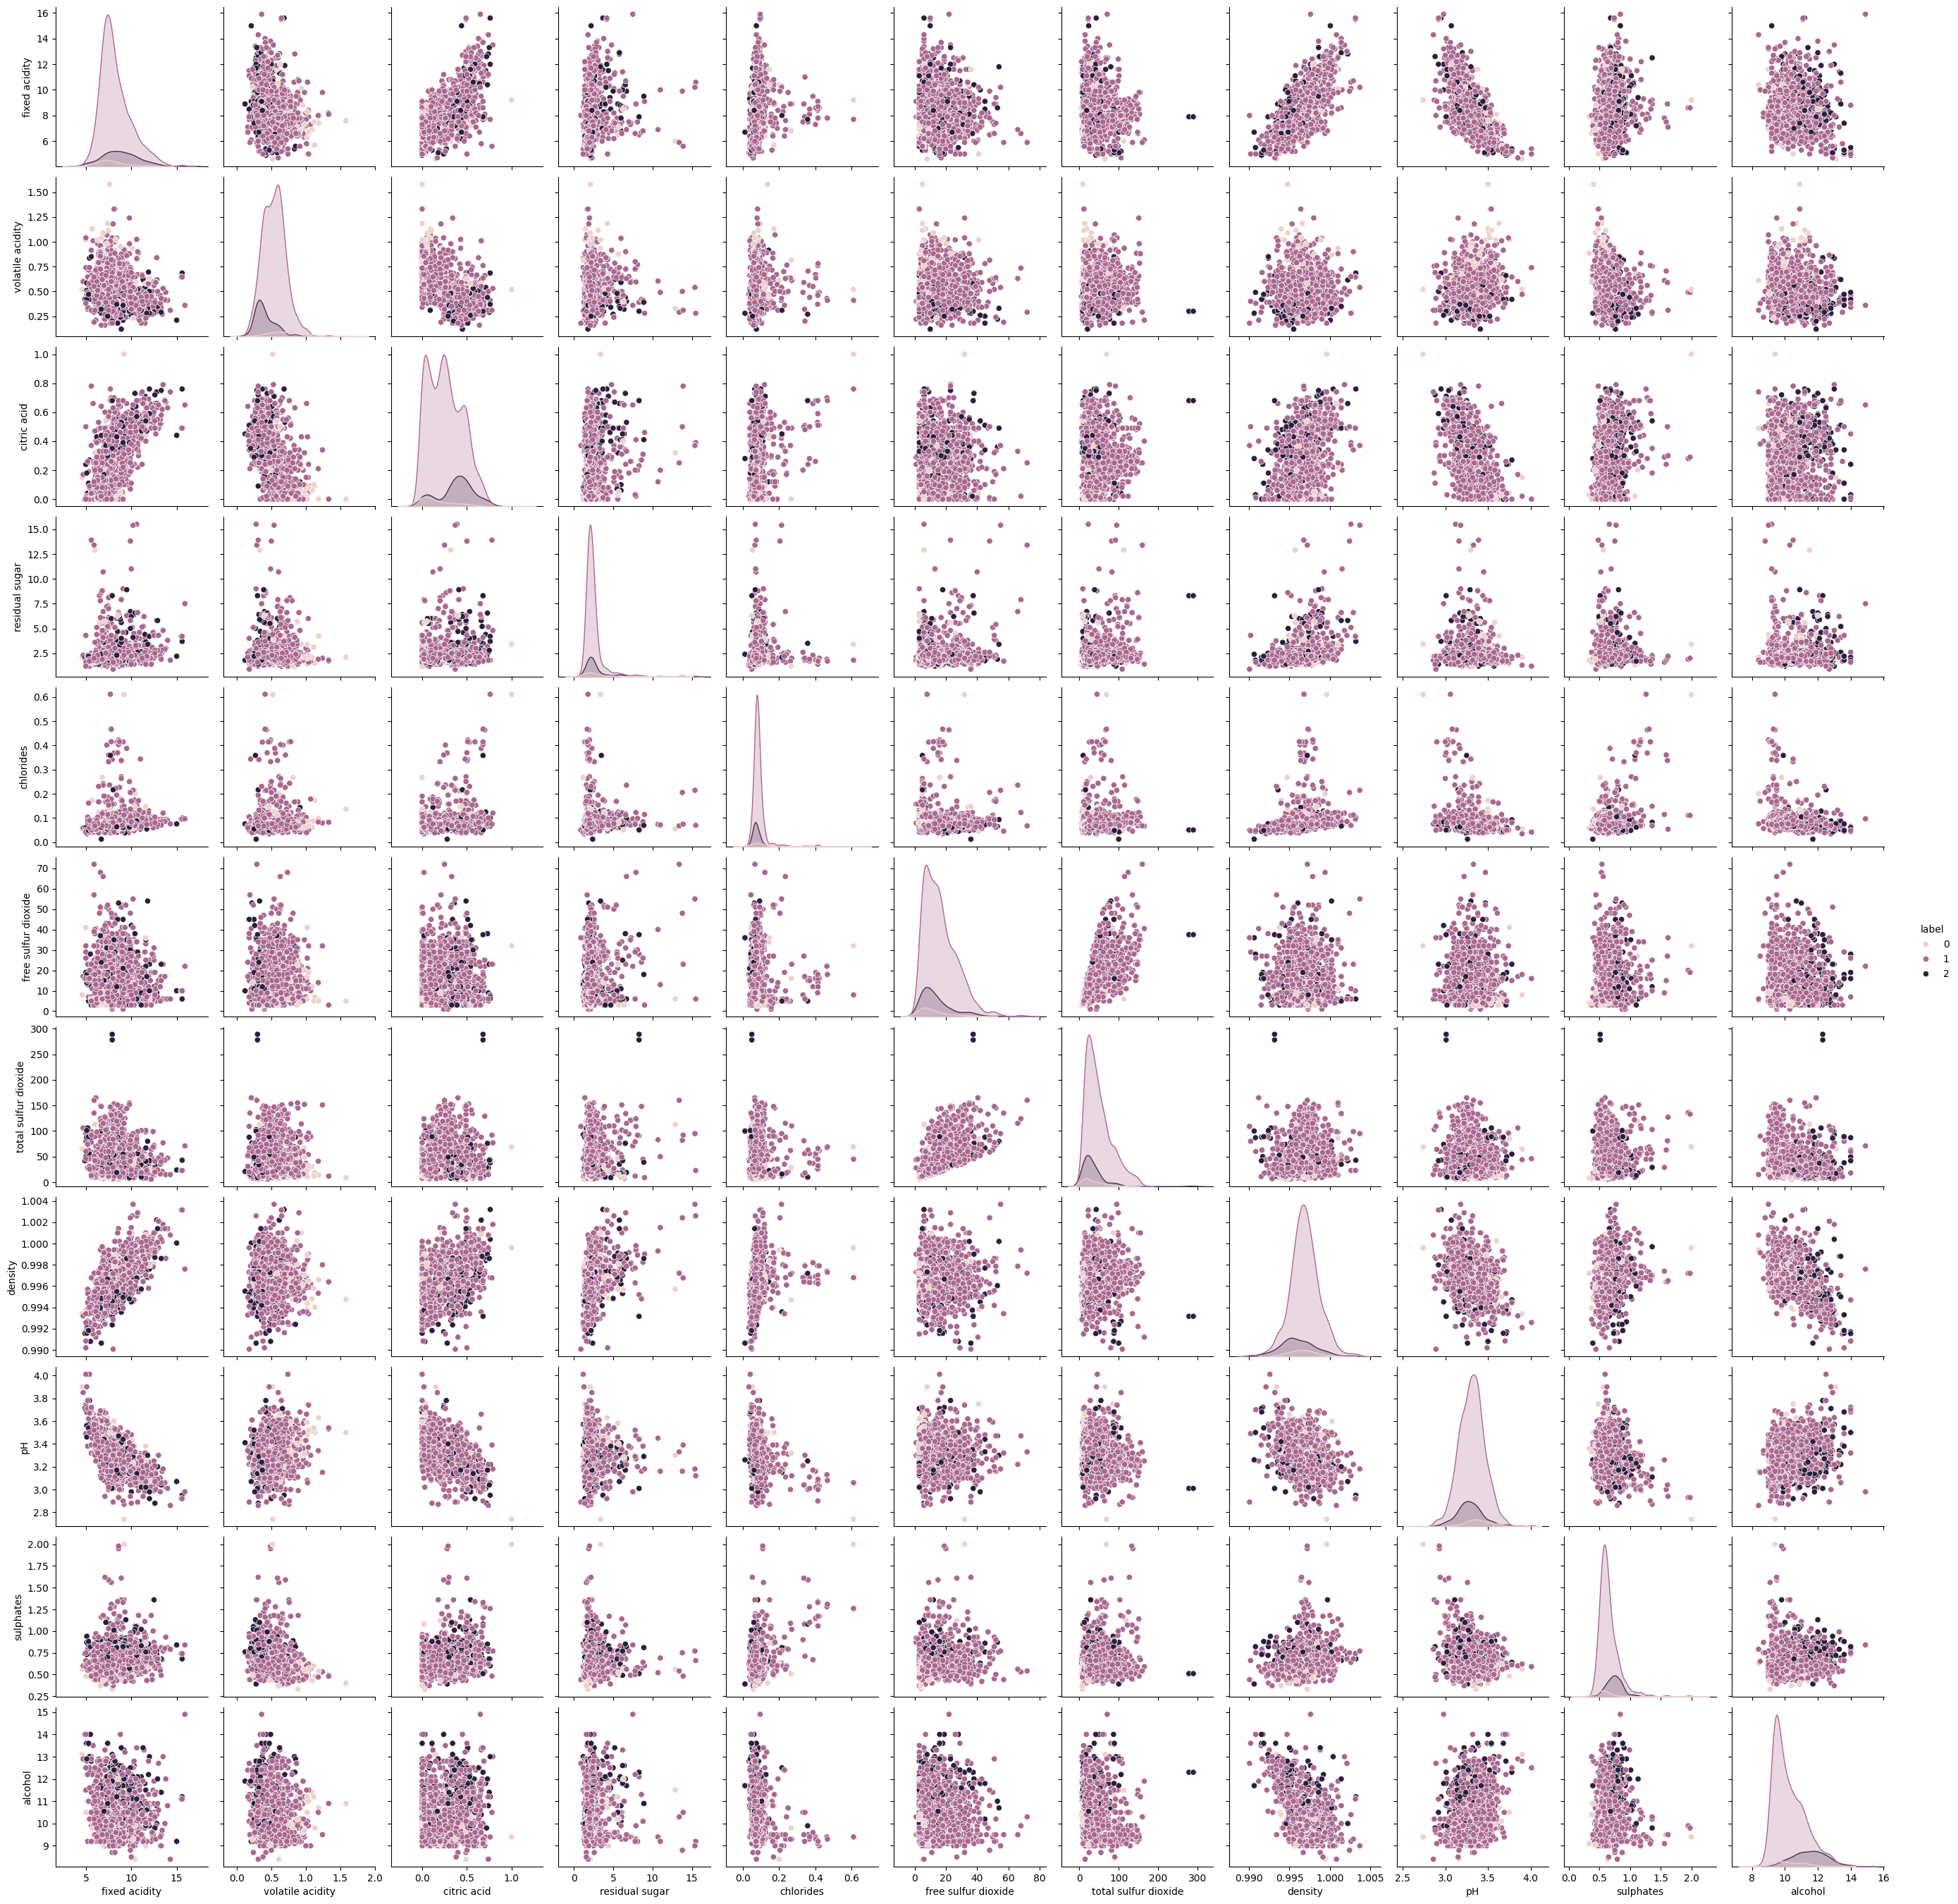

In [44]:
sns.pairplot(df,hue="label")
plt.show()

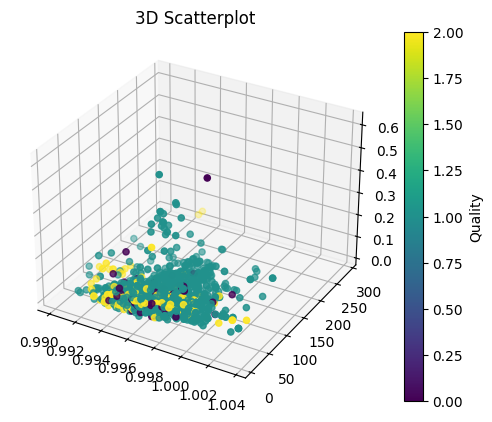

In [45]:
#ahora vamos a ver en 3d algunos parametros 
fig=plt.figure()
ax=fig.add_subplot(111,projection="3d")
x=df["density"]
y=df["total sulfur dioxide"]
z=df["chlorides"]
colores=df["label"]
scatter = ax.scatter(x, y, z, c=colores, cmap='viridis')
plt.colorbar(scatter, label='Quality')
plt.title('3D Scatterplot')
plt.show()


In [56]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans,kmeans_plusplus
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler,StandardScaler
#se probara cual es la mejor normalizacion para este caso, dado que hay algunos graficos que se ven como una desviacion estandar y unos que se ven sin forma, para fines del aprendisaje se hara la prueba

y=df["label"]
X=df.drop(columns="label")
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)
scaler_minmax=MinMaxScaler()
scaler_normal=StandardScaler()
X_train_minmax=scaler_minmax.fit_transform(X_train)
X_train_normal=scaler_normal.fit_transform(X_train)
X_test_minmax=scaler_minmax.transform(X_test)
X_test_normal=scaler_normal.transform(X_test)

X_train_minmax=pd.DataFrame(data=X_train_minmax,columns=X_train.columns,index=X_train.index)
X_test_minmax=pd.DataFrame(data=X_test_minmax,columns=X_test.columns,index=X_test.index)
X_train_normal=pd.DataFrame(data=X_train_normal,columns=X_train.columns,index=X_train.index)
X_test_normal=pd.DataFrame(data=X_test_normal,columns=X_test.columns,index=X_test.index)








In [57]:
model_MM=KNeighborsClassifier()
model_Norm=KNeighborsClassifier()
model_MM.fit(X_train_minmax,y_train)
model_Norm.fit(X_train_normal,y_train)



KNeighborsClassifier()

In [58]:
y_pred_MM=model_MM.predict(X_test_minmax)
y_pred_norm=model_Norm.predict(X_test_normal)

In [ ]:
acc_MM=accuracy_score(y_test,y_pred_MM)
acc_norm=accuracy_score(y_test,y_pred_norm)
print(f'accuracy modelo con minmax: {acc_MM}')
print(f'accuracy mdoelo binomial: {acc_norm}')
#podemos notar que se obtiene un mejor accuracy con una normalizacion binomial mas que con un minmax_scaler

accuracy modelo con minmax: 0.8375
accuracy mdoelo binomial: 0.84375


In [72]:
print(confusion_matrix(y_test,y_pred_MM))
print(classification_report(y_test,y_pred_MM))

[[  0  11   0]
 [  1 249  12]
 [  0  28  19]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.86      0.95      0.91       262
           2       0.61      0.40      0.49        47

    accuracy                           0.84       320
   macro avg       0.49      0.45      0.46       320
weighted avg       0.80      0.84      0.81       320



<Axes: >

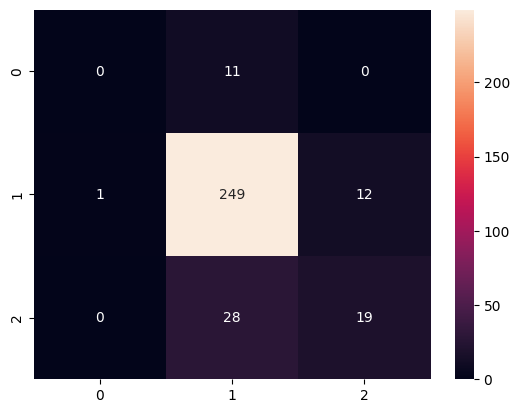

In [76]:
sns.heatmap(confusion_matrix(y_test,y_pred_MM),annot=True,fmt="d")

In [86]:
#ahora mejoraremos los hiperparametros
list=[]
for i in range(1,21):
    modelo=KNeighborsClassifier(n_neighbors=i)
    modelo.fit(X_train_normal,y_train)
    y_pred_test=modelo.predict(X_test_normal)
    list.append(accuracy_score(y_test,y_pred_test))
    print(f'el accuracy de {i} neighbors es: {accuracy_score(y_test,y_pred_test)}')
    

el accuracy de 1 neighbors es: 0.846875
el accuracy de 2 neighbors es: 0.80625
el accuracy de 3 neighbors es: 0.834375
el accuracy de 4 neighbors es: 0.85
el accuracy de 5 neighbors es: 0.84375
el accuracy de 6 neighbors es: 0.85
el accuracy de 7 neighbors es: 0.846875
el accuracy de 8 neighbors es: 0.840625
el accuracy de 9 neighbors es: 0.840625
el accuracy de 10 neighbors es: 0.84375
el accuracy de 11 neighbors es: 0.840625
el accuracy de 12 neighbors es: 0.846875
el accuracy de 13 neighbors es: 0.846875
el accuracy de 14 neighbors es: 0.85625
el accuracy de 15 neighbors es: 0.85625
el accuracy de 16 neighbors es: 0.83125
el accuracy de 17 neighbors es: 0.83125
el accuracy de 18 neighbors es: 0.828125
el accuracy de 19 neighbors es: 0.834375
el accuracy de 20 neighbors es: 0.821875


<Axes: >

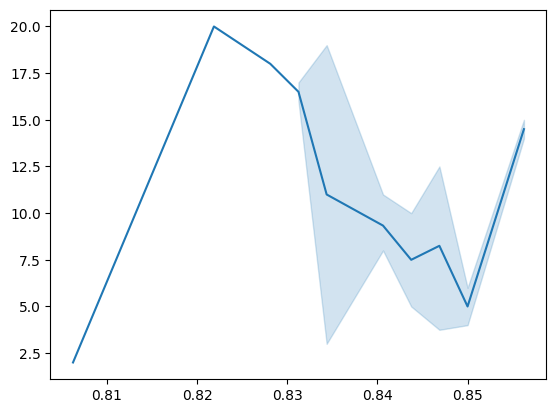

In [87]:
sns.lineplot(y=range(1,21),x=list)

In [ ]:
#voy a ver si un modelo XGBoost es mejor 
from xgboost import XGBClassifier
model_XGB=XGBClassifier()
model_XGB.fit(X_train_normal,y_train)
y_pred_XGB=model_XGB.predict(X_test_normal)
print(f'el accuracy del modelo XGBoost es {accuracy_score(y_test,y_pred_XGB)}')




el accuracy del modelo XGBoost es 0.8625


<Axes: >

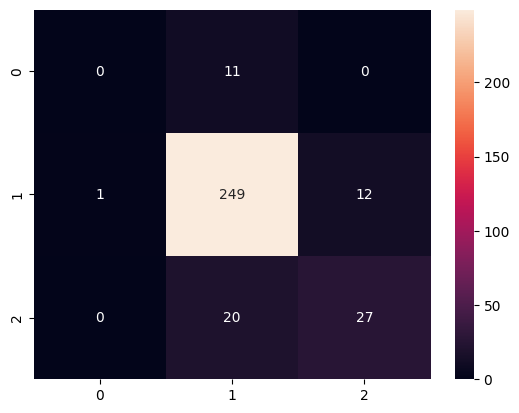

In [80]:
#el modelo XGBoost es tiene mejor accuracy sin mejorar los paramtros
#veremos a continuacion la matriz de confusion
sns.heatmap(confusion_matrix(y_test,y_pred_XGB),annot=True,fmt="d")

finalmente se puede concluir que el mejor resultado con el modelo K_Neighbors se obtiene con el hiperparametro n_neighbors=14 y podemos concluir que el dataset esta debalanceado y se necesita conseguir o mas datos o mejores datos, que abarquen todo el espectro de posibles resultados.
agregar tambien, que se realizo un modelo de XGBoost a modo de comparativa , y resulto que este mejoraba en la precision, en los vinos de mejor calidad, pero aun asi no acertaba en el vino de baja calidad. finalmente independiente del modelo, se necesita mejorar la calidad de los datos para obtener un mejor funcionamiento del modelo.


